In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datset = pd.read_csv('D:/Others/Projects/Movie Recommendation System/Dataset.csv')
movies = pd.read_csv('D:/Others/Projects/Movie Recommendation System/Movie_Id_Titles.csv')

In [3]:
ratings = pd.merge(movies,datset, on='item_id')

In [4]:
ratings.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [6]:
ratings = ratings.drop(['timestamp'],axis = 1)

In [7]:
ratings.head()

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


## EDA

In [9]:
ratings.shape

(100003, 4)

In [11]:
ratings['rating'].value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

In [12]:
ratings.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: rating, dtype: float64

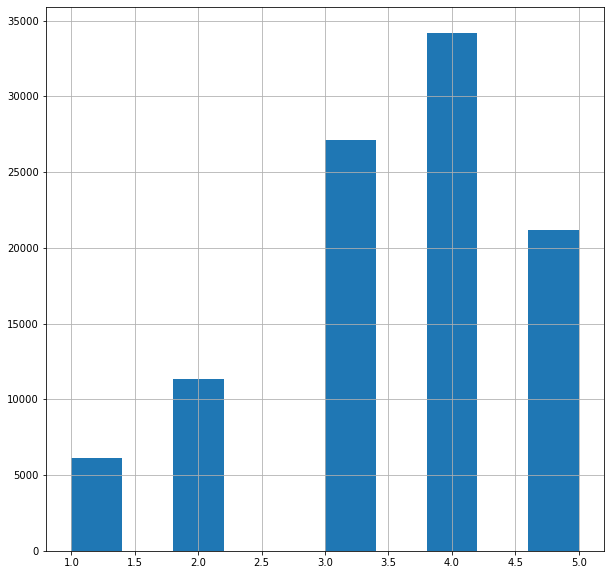

In [13]:
ratings['rating'].hist(figsize= (10,10))
plt.show()

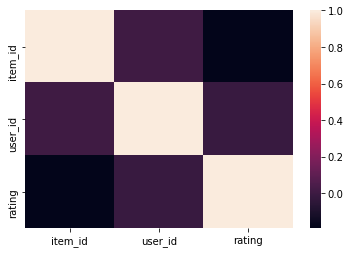

In [16]:
tc = ratings.corr()
sns.heatmap(tc)
plt.show()

In [19]:
avg_ratings = pd.DataFrame(ratings.groupby('title')['rating'].mean())
avg_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [21]:
avg_ratings['rating_numbers'] = pd.DataFrame(ratings.groupby('title')['rating'].count())

In [22]:
avg_ratings.head()

,rating,rating_numbers
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [27]:
movieRate = ratings.pivot_table(index='user_id', columns='title', values='rating')

In [28]:
movieRate.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
movieRate = movieRate.dropna(thresh = 5, axis=1).fillna(0)

In [33]:
movieRate.head()

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
item_similarity = movieRate.corr(method='pearson')
item_similarity.head()

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wolf (1994),"Women, The (1939)","Wonderful, Horrible Life of Leni Riefenstahl, The (1993)",Wonderland (1997),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
101 Dalmatians (1996),1.000000,0.059375,-0.001026,0.052983,0.128832,0.078451,0.015592,0.005819,0.221130,0.121285,...,0.057828,0.051990,-0.034379,0.000754,0.074758,0.109125,0.155599,0.115300,0.039243,-0.005846
12 Angry Men (1957),0.059375,1.000000,-0.014261,0.066459,0.230361,0.298878,0.339260,0.174562,0.019941,0.156865,...,0.048841,0.145077,0.138377,-0.004764,0.170314,0.160215,0.290332,0.165072,0.079418,0.038188
187 (1997),-0.001026,-0.014261,1.000000,0.078831,-0.010273,-0.039807,-0.021359,-0.006205,0.127598,0.017356,...,0.085036,-0.024068,-0.020277,0.115338,-0.025753,-0.000791,-0.021764,0.006881,0.053885,0.063828
2 Days in the Valley (1996),0.052983,0.066459,0.078831,1.000000,0.056372,0.091159,-0.019876,-0.008144,0.245286,0.129326,...,0.087648,0.069056,-0.001807,-0.026960,0.028328,0.116563,0.061485,0.197710,0.176088,0.146833
"20,000 Leagues Under the Sea (1954)",0.128832,0.230361,-0.010273,0.056372,1.000000,0.384624,0.274579,0.118159,0.117611,0.231341,...,0.244146,0.130682,0.062690,-0.001689,0.101680,0.286895,0.309606,0.243381,0.058035,0.071166


In [36]:
 def get_similar_movies(movie_name, user_rating):
        similar_score = item_similarity[movie_name]*(user_rating-2.5)
        similar_score = similar_score.sort_values(ascending = False)
        
        return similar_score

print(get_similar_movies('101 Dalmatians (1996)', 1))

title
Full Monty, The (1997)                             0.163595
Cop Land (1997)                                    0.140129
L.A. Confidential (1997)                           0.127179
Everyone Says I Love You (1996)                    0.118625
Boogie Nights (1997)                               0.117361
                                                     ...   
Jungle Book, The (1994)                           -0.505433
Twister (1996)                                    -0.509971
Homeward Bound II: Lost in San Francisco (1996)   -0.537691
Jack (1996)                                       -0.598166
101 Dalmatians (1996)                             -1.500000
Name: 101 Dalmatians (1996), Length: 1144, dtype: float64
